In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from financepy.models.black import *
from financepy.utils.global_types import *

####################################################################
#  FINANCEPY BETA Version 0.370 - This build: 28 Oct 2024 at 20:26 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



### Vanilla Call Option Deal Specification

In [2]:
def blackImpliedVol(forward,   # Forward rate F
                    K,         # Strike Rate K
                    T,         # Time to Expiry (years)
                    DF,        # df RFR to expiry date
                    callOrPut, # FinOptionTypes.EUROPEAN_CALL or FinOptionTypes.EUROPEAN_PUT
                    price
                    ):    
    min_ivol, max_ivol = 0.001, 1.0
    f = lambda ivol: Black(ivol).value(forward, K, T, DF, callOrPut) - price    
    return optimize.bisect(f, min_ivol, max_ivol) 

In [3]:
T = 1
K = 100
S0 = 100
q = 0.0
r = 0.0
DF = np.exp(-r*T)
ivol = 0.2
forward = S0 * np.exp(-q*T)/DF

model = Black(ivol)
callOrPut = OptionTypes.EUROPEAN_CALL

In [4]:
DF

1.0

In [5]:
model.value(forward, K, T, DF, callOrPut)

7.965579241666205

### Implied volatility

In [6]:
blackImpliedVol(forward,  
                K,  
                T,       
                DF,      
                OptionTypes.EUROPEAN_CALL,
                11.9235
                )

0.2999989244397383

In [7]:
price = 7.965579241666191
blackImpliedVol(forward, K, T, DF, callOrPut, price)   

0.1999999999989213

### Risk Measures

In [8]:
model.delta(forward, K, T, DF, callOrPut)

0.539827896208331

In [9]:
model.gamma(forward, K, T, DF, callOrPut)

0.01984762737385059

In [10]:
model.theta(forward, K, T, DF, callOrPut)

-3.9695254747701183

In [11]:
model.vega(forward, K, T, DF, callOrPut)

39.69525474770118

### Vectorization

Text(0, 0.5, 'Option Premium')

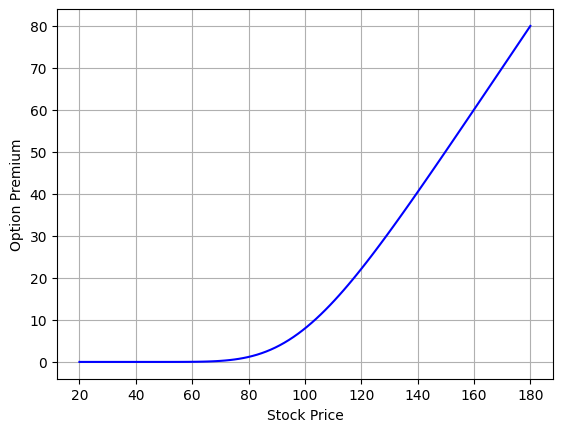

In [12]:
Spots = np.linspace(20,180,100)
Forwards = [S*np.exp(-q*T)/DF for S in Spots]

value = [model.value(F, K, T, DF, callOrPut) for F in Forwards]
plt.plot(Spots, value, 'b')
plt.grid(linestyle='-')
plt.xlabel("Stock Price")
plt.ylabel("Option Premium")

Text(0, 0.5, 'Option Delta')

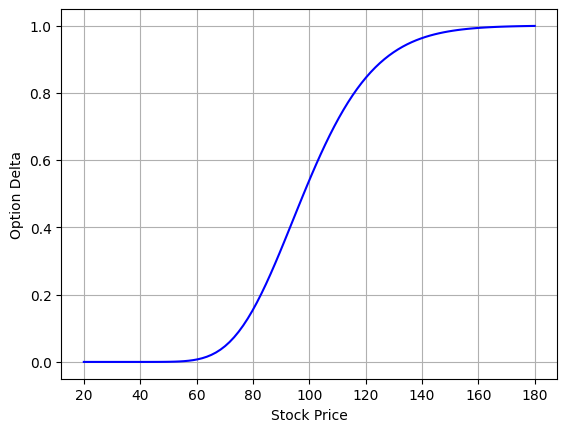

In [13]:
deltas = [model.delta(F, K, T, DF, callOrPut) for F in Forwards]
plt.plot(Spots, deltas, 'b')
plt.grid(linestyle='-')
plt.xlabel("Stock Price")
plt.ylabel("Option Delta")

Text(0, 0.5, 'Option Gamma')

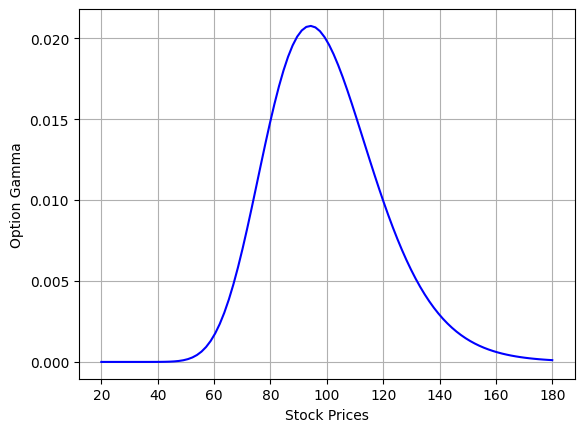

In [14]:
gammas = [model.gamma(F, K, T, DF, callOrPut) for F in Forwards]
plt.plot(Spots, gammas, 'b')
plt.grid(linestyle='-')
plt.xlabel("Stock Prices")
plt.ylabel("Option Gamma")

Text(0, 0.5, 'Option Theta')

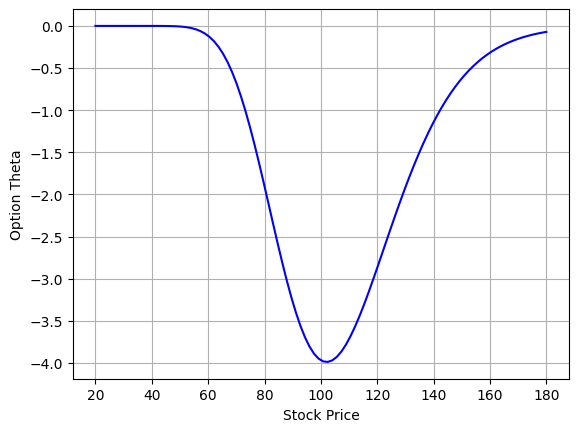

In [15]:
thetas = [model.theta(F, K, T, DF, callOrPut) for F in Forwards]
plt.plot(Spots, thetas, 'b')
plt.grid(linestyle='-')
plt.xlabel("Stock Price")
plt.ylabel("Option Theta")

Text(0, 0.5, 'Option Vega')

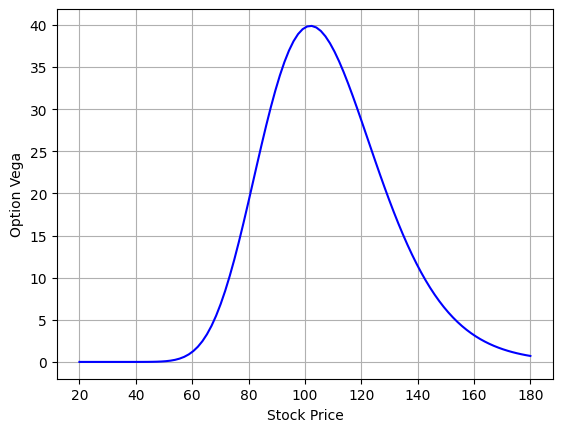

In [16]:
vegas = [model.vega(F, K, T, DF, callOrPut) for F in Forwards]
plt.plot(Spots, vegas, 'b')
plt.grid(linestyle='-')
plt.xlabel("Stock Price")
plt.ylabel("Option Vega")

### Figure 1 - Call payoff

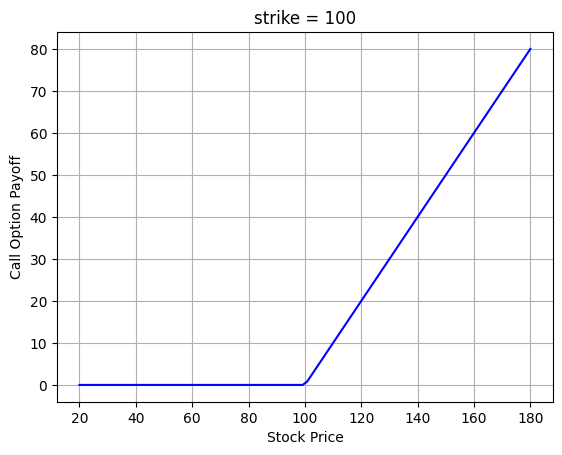

In [17]:
callpayoff = [model.value(S, K, 1e-99, DF, callOrPut) for S in Spots]
plt.plot(Spots, callpayoff, 'b')
plt.grid(linestyle='-')
plt.xlabel("Stock Price")
plt.ylabel("Call Option Payoff")

plt.title("strike = 100")
#plt.savefig("L1_Fig01.png")
plt.show()

### Figure 2 - Put payoff

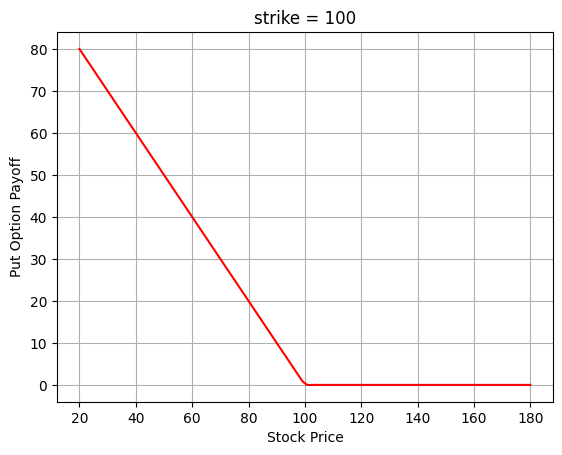

In [18]:
putpayoff = [model.value(S, K, 1e-99, DF, OptionTypes.EUROPEAN_PUT) for S in Spots]
plt.plot(Spots, putpayoff, 'r')
plt.grid(linestyle='-')
plt.xlabel("Stock Price")
plt.ylabel("Put Option Payoff")

plt.title("strike = 100")
#plt.savefig("L1_Fig02.png")
plt.show()

### Figure 3 - Call Option Value

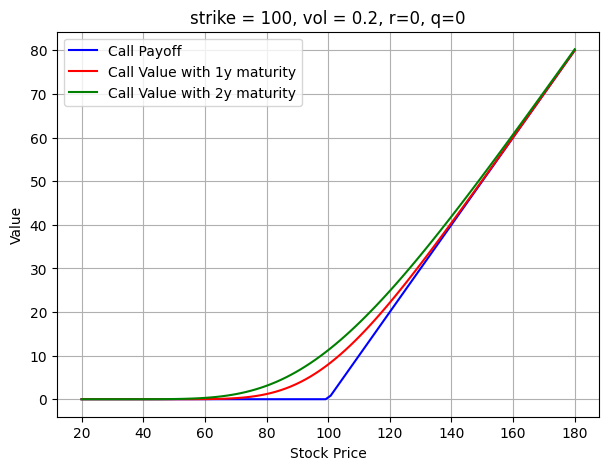

In [19]:
callpayoff = [model.value(S, K, 1e-99, DF, callOrPut) for S in Spots]
callvalue1 = [model.value(S*np.exp((r-q)*1.0), K, 1.0, DF, callOrPut) for S in Spots]
callvalue2 = [model.value(S*np.exp((r-q)*2.0), K, 2.0, DF, callOrPut) for S in Spots]

output = np.array([Spots, callpayoff, callvalue1, callvalue2])
output = np.transpose(output)

df = pd.DataFrame(output, columns =['S_0', 'Call Payoff', 'Call Value with 1y maturity', 'Call Value with 2y maturity']) 
df = df.set_index('S_0')

df.plot(grid=True, figsize=(7, 5), color=['blue', 'red', 'green'])
plt.title("strike = 100, vol = 0.2, r=0, q=0")

plt.xlabel("Stock Price")
plt.ylabel("Value")

#plt.savefig("L1_Fig03.png")

plt.show()

### Figure 4 - Put Call Parity

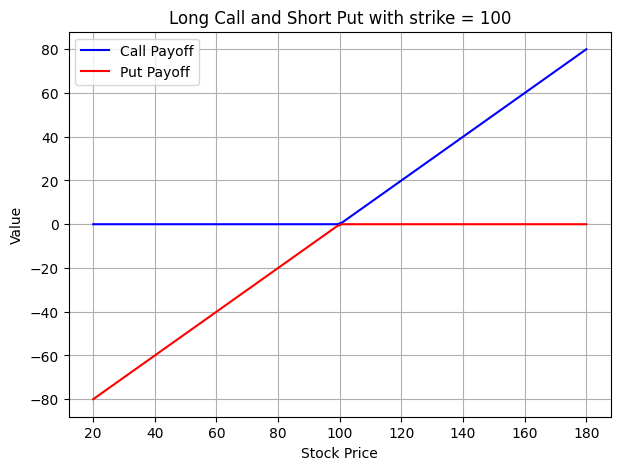

In [20]:
minus_putpayoff = [-p for p in putpayoff]
output = np.array([Spots, callpayoff, minus_putpayoff])
output = np.transpose(output)

df = pd.DataFrame(output, columns =['S_0', 'Call Payoff', 'Put Payoff']) 
df = df.set_index('S_0')

df.plot(grid=True, figsize=(7, 5), color=['blue', 'red'])
plt.title("Long Call and Short Put with strike = 100")

plt.xlabel("Stock Price")
plt.ylabel("Value")

#plt.savefig("L1_Fig04.png")

plt.show()